Automatically created module for IPython interactive environment


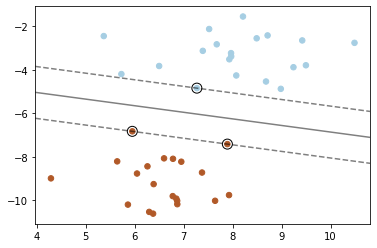

In [1]:
print(__doc__)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

2.2.0
x_train.shape:  (60000, 32, 32)
y_train.shape:  (60000,)
x_test.shape: (10000, 32, 32)
y_test.shape: (10000,)


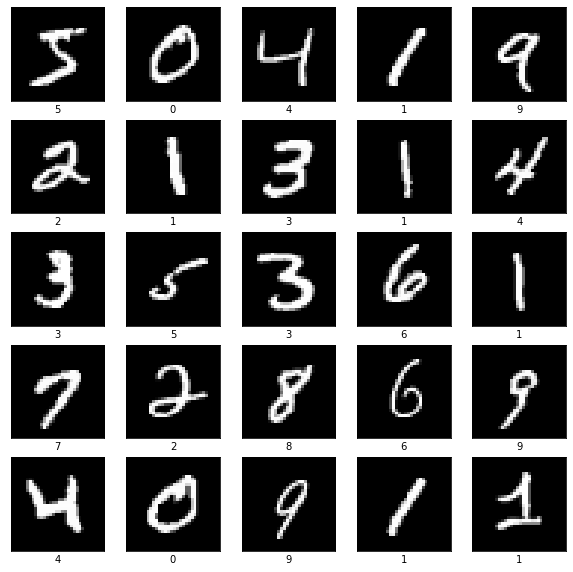

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 207,010
Trainable params: 207,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2368 - accuracy: 0.9326
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9697
313/313 - 0s - loss: 0.0925 - accuracy: 0.9727

Test accuracy: 0.9726999998092651


In [2]:
%matplotlib inline
%load_ext tensorboard
import tensorflow as tf
import datetime
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# Clear any logs from previous runs
# !rm -rf ./logs/ 

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
x_train = tf.pad(x_train, paddings, constant_values=0)
x_test = tf.pad(x_test, paddings, constant_values=0)

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.reshape(x_train[i], [32,32]), cmap=plt.cm.gray)
    plt.xlabel(class_names[y_train[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 1)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model.summary())

# log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# log_dir = "./tb_logs/fit/"
log_dir = ".\\logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x_train, y_train, epochs=2, callbacks=[tensorboard_callback])

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

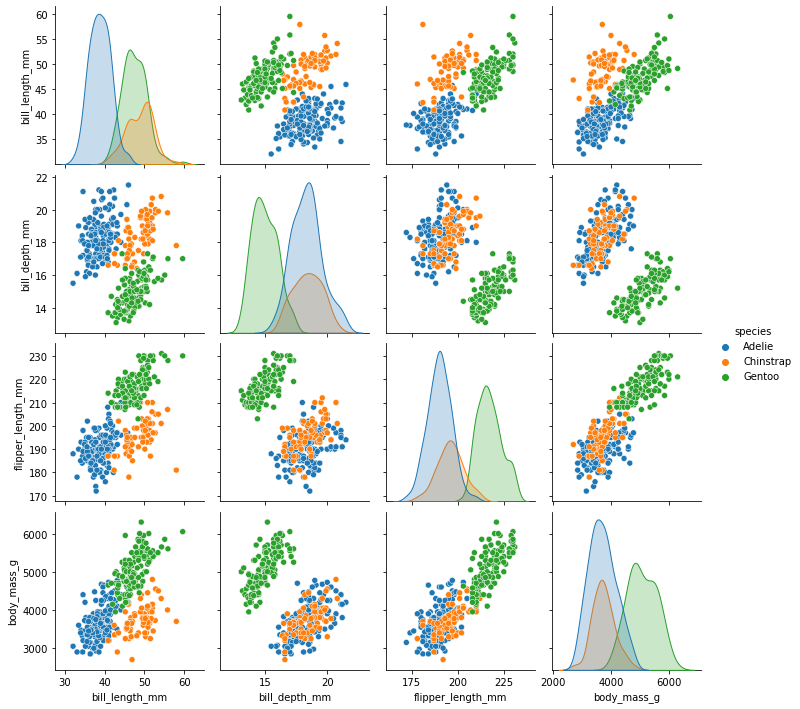

In [2]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")